# AUTOMOBILE IMPORTS PRICE PREDICTION  

## Description

- This is an Automobile Imports Data Set which contains various characteristics of the cars including insurance risk rating and other price indicators. The target is to predict the price of the cars.

## Input Variables
    symboling: [its assigned insurance risk rating -> [-3, -2, -1, 0, 1, 2, 3]]
    normalized-losses: [average loss payment per insured vehicle year -> continuous from 65 to 256.]
    make: [ Manufacturer name eg : alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu etc. ]
    fuel-type: [diesel, gas]
    aspiration: [std, turbo] - turbo charger improves the engine performance.
    num-of-doors: [four, two] - generally 2 door cars are supercars which are relatively expensive.
    body-style: [hardtop, wagon, sedan, hatchback, convertible] - Convertibles are luxury cars, sedan>wagon>hardtop>hatchback.
    drive-wheels: [4wd, fwd, rwd] - 4wd means all wheels are powered, fwd is front wheel drive and rwd means rear wheel drive.
    engine-location: [front, rear] - this effects the power distribution over the vehicle.
    wheel-base: [continuous from 86.6 120.9] - the distance between front and rear axles.
    length: [continuous from 141.1 to 208.1]
    width: [continuous from 60.3 to 72.3]
    height: [continuous from 47.8 to 59.8]
    curb-weight: [continuous from 1488 to 4066]
    engine-type: [dohc, dohcv, l, ohc, ohcf, ohcv, rotor]
    num-of-cylinders: [eight, five, four, six, three, twelve, two] - this shows the size of engine & how it is distributed.
    engine-size: [continuous from 61 to 326] 
    fuel-system: [1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi]
    bore: [continuous from 2.54 to 3.94]
    stroke: [continuous from 2.07 to 4.17]
    compression-ratio: [continuous from 7 to 23]
    horsepower: [continuous from 48 to 288]
    peak-rpm: [continuous from 4150 to 6600]
    city-mpg: [continuous from 13 to 49]
    highway-mpg: [continuous from 16 to 54]

    Output Variable price: [continuous from 5118 to 45400]


## Reading and Understanding the Data

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from collections import Counter

In [113]:
df=pd.read_csv('auto_imports.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## Transforming Data
     column names in the above data are converted to a row and then appropriate attributes are given

In [114]:
df.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [115]:
row=pd.DataFrame([3, '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', 88.60, 168.80, 64.10, 48.80, 2548, 'dohc', 'four',
       130, 'mpfi', 3.47, 2.68, 9.00, 111, 5000, 21, 27,13495])
row=row.transpose()
row

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495


In [116]:
# Change column names

df.columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
row.columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [117]:
row.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495


In [118]:
cars=pd.concat([df,row],ignore_index=1)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## Exploratory Data Analysis

### Data Inspection

In [119]:
cars.shape
# Data has 26 attributes and 201 rows

(201, 26)

In [120]:
# The data contains "?" symbols. So replace this symbols to NAN Values.

cars=cars.replace('?',np.nan)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [121]:
# Analyse the data

cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [122]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [123]:
# Converting the variables which are integer but the model is considering it as string

cars[['normalized_losses','bore','stroke','horsepower','peak_rpm']]=cars[['normalized_losses','bore','stroke','horsepower','peak_rpm']].astype('float64')

In [124]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [125]:
cars.duplicated().sum()
# No duplicate rows present

0

In [126]:
# Checking NaN values in each column

cars.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

### Filling the missing values
   - ####  If the variable is catogerical values it is filled by mode.
   - ####  If the variable is numerical values it is filled by mean.

In [127]:
cars['normalized_losses']=cars['normalized_losses'].fillna(cars['normalized_losses'].mean())

In [128]:
cars['num_of_doors']=cars['num_of_doors'].fillna(cars['num_of_doors'].mode()[0])

In [129]:
cars['bore']=cars['bore'].fillna(cars['bore'].mean())

In [130]:
cars['stroke']=cars['stroke'].fillna(cars['stroke'].mean())

In [131]:
cars['horsepower']=cars['horsepower'].fillna(cars['horsepower'].mean())

In [132]:
cars['peak_rpm']=cars['peak_rpm'].fillna(cars['peak_rpm'].mean())

In [133]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Handling categorical values

In [134]:
cars.select_dtypes(include=['object']).head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi


##### - Find and Replace
    Values in words are replaced with numbers

In [135]:
Counter(cars.num_of_doors)
# num_of_doors contains 2 or 4 doors

Counter({'two': 86, 'four': 115})

In [136]:
Counter(cars.num_of_cylinders)
# num_of_cylinder containg 2,3,4,5,6,8,12 cylinders

Counter({'four': 157,
         'six': 24,
         'five': 10,
         'three': 1,
         'twelve': 1,
         'two': 4,
         'eight': 4})

In [137]:
# Values are assigned with corresponding keys

cars['num_of_doors'].replace({'two': 2, 'four': 4},inplace=True)
cars['num_of_cylinders'].replace({'four': 4,
         'six': 6,
         'five': 5,
         'three': 3,
         'twelve': 12,
         'two': 2,
         'eight': 8},inplace=True)

In [138]:
# Coping data for redundancy

data= cars.copy()

##### - Label Encoding
    Converting values with numbers

In [139]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

cars.make=enc.fit_transform(cars.make)
cars.fuel_type=enc.fit_transform(cars.fuel_type)
cars.aspiration=enc.fit_transform(cars.aspiration)
cars.engine_location=enc.fit_transform(cars.engine_location)
cars.engine_type=enc.fit_transform(cars.engine_type)
cars.fuel_system=enc.fit_transform(cars.fuel_system)
cars.body_style=enc.fit_transform(cars.body_style)
cars.drive_wheels=enc.fit_transform(cars.drive_wheels)

In [140]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,122.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,1,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,1,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,122.0,1,1,0,2,3,1,0,99.8,...,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250


### Visualizing Data

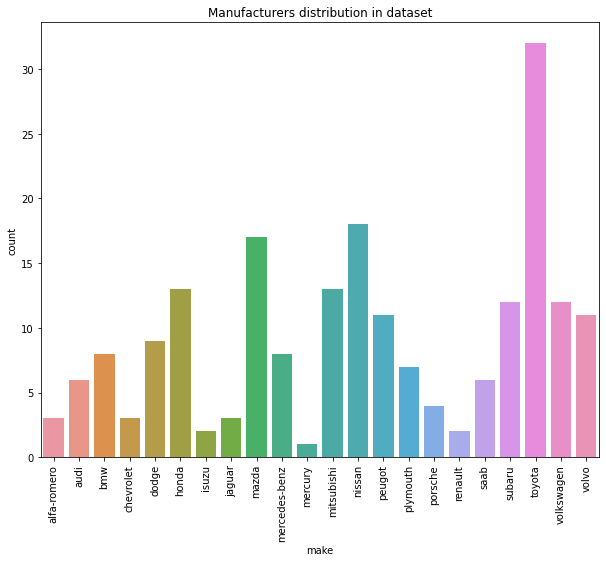

In [141]:
# Checking the data for how it is distributed over the manufacturers

from matplotlib import rcParams
rcParams["figure.figsize"]=10,8
sb.countplot(data["make"])
plt.xticks(rotation=90)
plt.title("Manufacturers distribution in dataset")
plt.show()

    Top Selling Car Manufacturer is Toyota

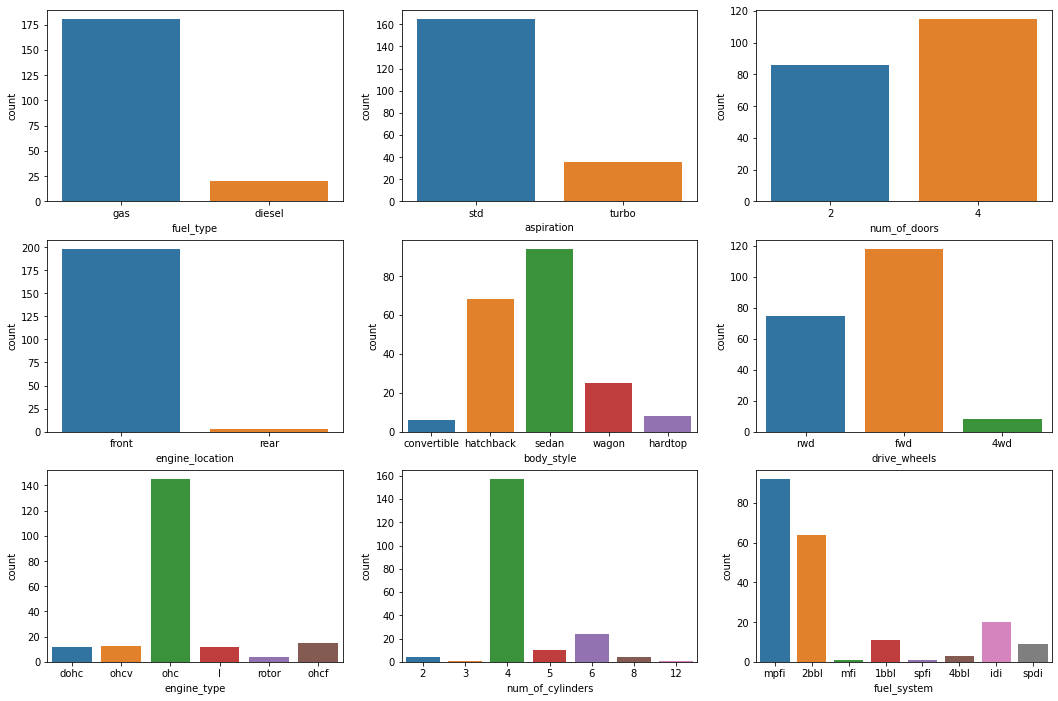

In [142]:
categorical = ['fuel_type', 'aspiration', 'num_of_doors', 'engine_location',
              'body_style','drive_wheels','engine_type', 'num_of_cylinders','fuel_system']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical, axs.ravel()):
    sb.countplot(x=col, data=data, ax=ax)

    Maximum Cars are running on gas
    Maximum Cars have 4 door
    Maximum Cars are sedan
    Maximum Cars have engine in front
    Maximum Cars have 4 cylinders
    Maximum Cars have mpfi as fuel system

In [143]:
# Finding the correlation between each variable to check for multi collinearity

cars.corr()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,4.662638e-01,-0.129645,0.196735,-0.054615,-0.672344,-0.600333,-0.053056,2.123389e-01,-0.535987,...,-0.110581,0.091601,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391
normalized_losses,0.466264,1.000000e+00,-0.254356,0.101546,-0.006911,-0.361368,-0.251775,0.317214,1.355890e-17,-0.056661,...,0.112360,0.230311,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
make,-0.129645,-2.543563e-01,1.000000,-0.109330,0.071254,0.146172,0.090621,-0.034844,5.331188e-02,0.073930,...,-0.084770,0.144769,0.236765,-0.203756,0.132554,-0.064598,-0.213009,0.065761,0.059111,-0.163646
fuel_type,0.196735,1.015463e-01,-0.109330,1.000000,-0.408228,-0.186681,-0.147654,-0.131096,4.091700e-02,-0.307237,...,-0.070779,0.042824,-0.054435,-0.241033,-0.985231,0.168977,0.475759,-0.265676,-0.198690,-0.110326
aspiration,-0.054615,-6.910980e-03,0.071254,-0.408228,1.000000,0.063017,0.072079,0.094469,-5.749596e-02,0.256889,...,0.110040,0.282269,0.227782,0.218190,0.307522,0.251235,-0.189982,-0.189237,-0.241851,0.179578
num_of_doors,-0.672344,-3.613676e-01,0.146172,-0.186681,0.063017,1.000000,0.688542,-0.115920,-1.423403e-01,0.445245,...,0.024094,0.001246,0.119140,-0.007780,0.169164,-0.102856,-0.232031,-0.027617,-0.045787,0.042435
body_style,-0.600333,-2.517751e-01,0.090621,-0.147654,0.072079,0.688542,1.000000,-0.161004,-2.783504e-01,0.407128,...,-0.063692,-0.054810,0.021182,-0.013468,0.134622,-0.136575,-0.105785,0.014217,-0.021328,-0.072933
drive_wheels,-0.053056,3.172142e-01,-0.034844,-0.131096,0.094469,-0.115920,-0.161004,1.000000,1.493687e-01,0.467661,...,0.526027,0.435926,0.471925,0.078852,0.120125,0.546033,-0.035667,-0.469240,-0.472893,0.588333
engine_location,0.212339,1.355890e-17,0.053312,0.040917,-0.057496,-0.142340,-0.278350,0.149369,1.000000e+00,-0.189115,...,0.199367,0.106735,0.188404,-0.139351,-0.020467,0.342146,0.201937,-0.157132,-0.102964,0.331062
wheel_base,-0.535987,-5.666124e-02,0.073930,-0.307237,0.256889,0.445245,0.407128,0.467661,-1.891150e-01,1.000000,...,0.572027,0.381273,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642


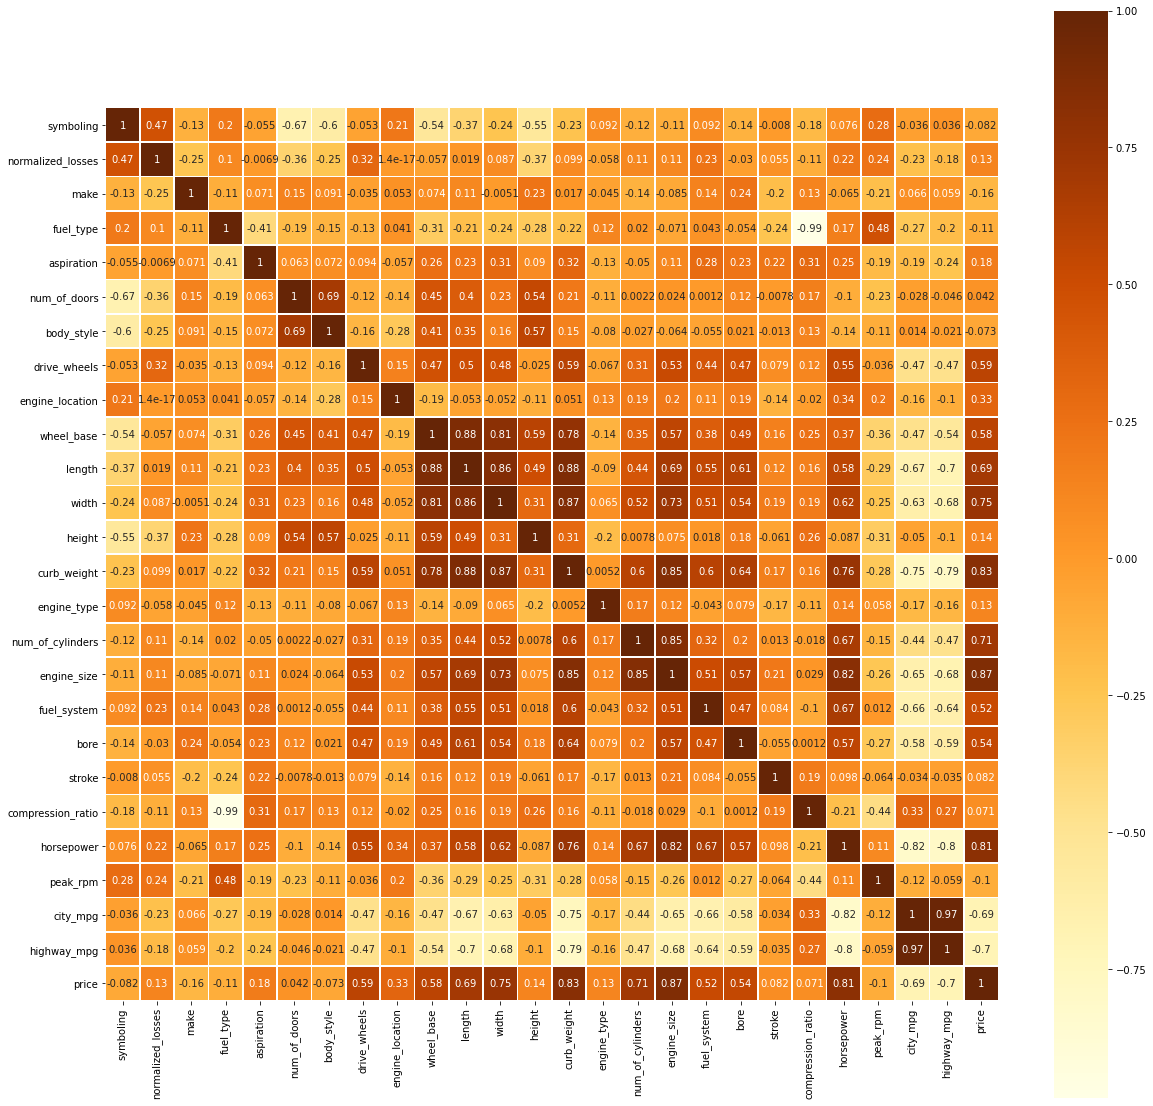

In [144]:
# Finding correlation using Seaborn Correlation Heatmap

plt.figure(figsize = (20,20))
sb.heatmap(cars.corr(), annot = True,linewidths=0.5,square=True,cmap="YlOrBr")
plt.show()

   Above graph shows :
   - Wheel base , Length , Width are highly correlated.
   - Highway_mpg and city_mpg is also highly correlated.
   - Compression ratio and fuel type is also correlated
   - Length, Width and curb_weight are also correlated

In [145]:
cars.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

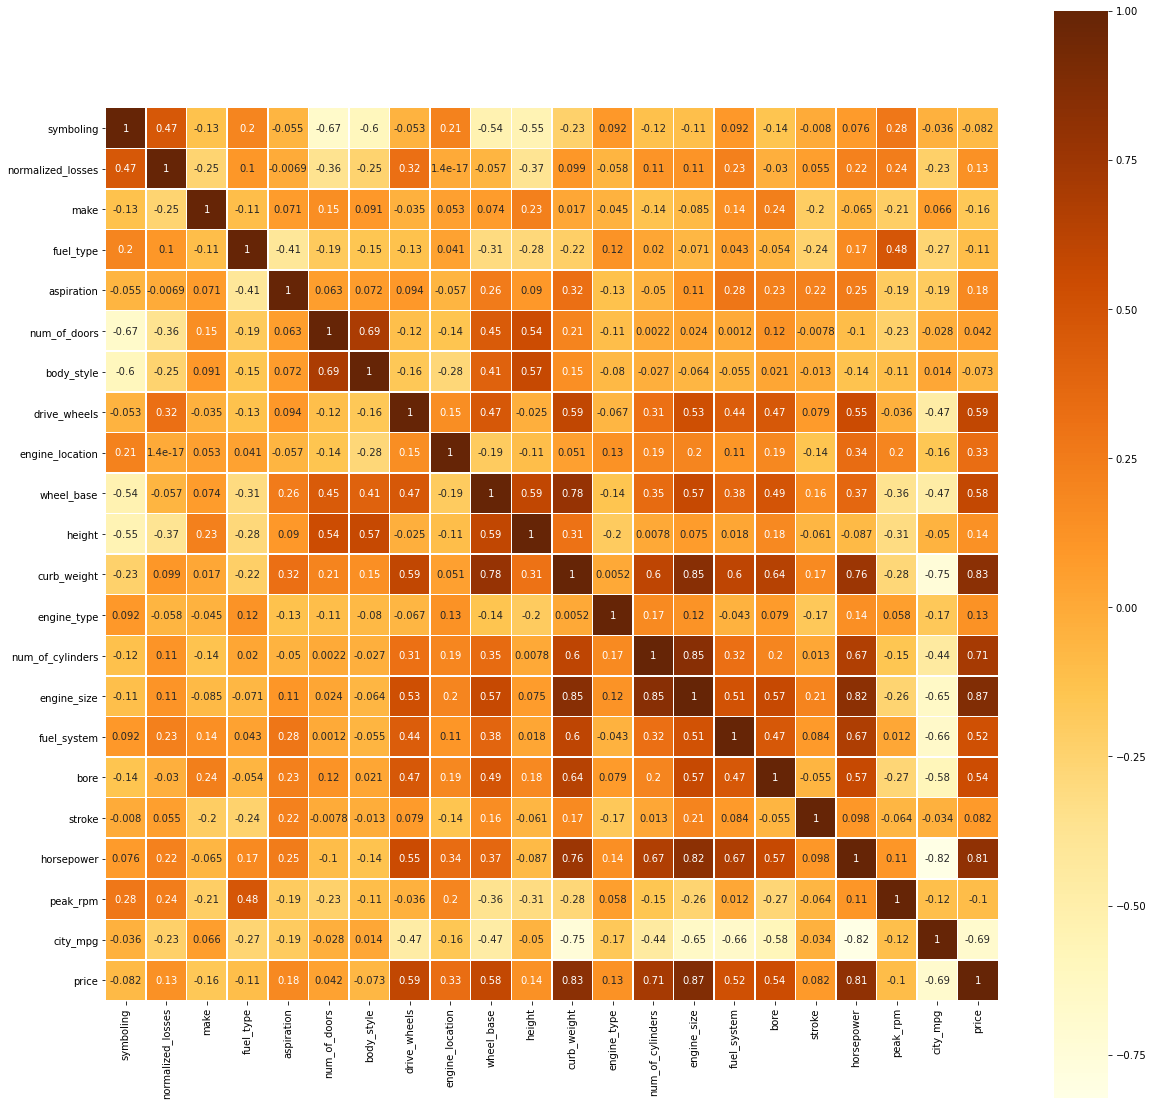

In [146]:
# Droping highly Correlated values
cars.drop(['length', 'width','highway_mpg','compression_ratio'],axis=1,inplace=True)

# Finding correlation using Seaborn Correlation Heatmap
plt.figure(figsize = (20,20))
sb.heatmap(cars.corr(), annot = True,linewidths=0.5,square=True,cmap="YlOrBr")
plt.show()

## Predictors that are highly correlated with price
- 1. Engine size
- 2. Curb weight
- 3. Horsepower
- 4. City mpg

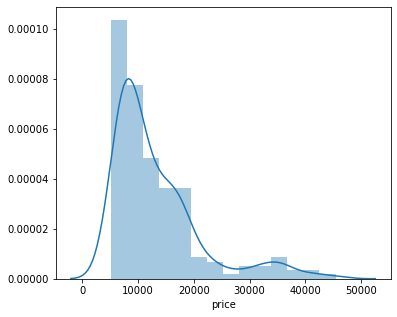

In [147]:
# Checking the normal distribution of the data to  have an idea of how the price is spread out.

rcParams["figure.figsize"]=6,5
sb.distplot(data["price"])

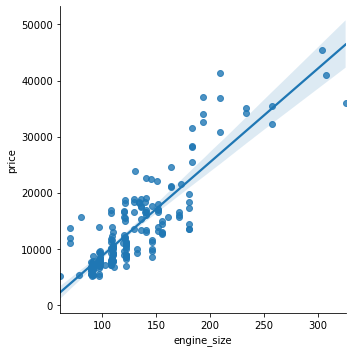

In [148]:
# Plotting a linear line to understand the relation between engine size and price.

sb.lmplot(x='engine_size' , y='price',data=data)

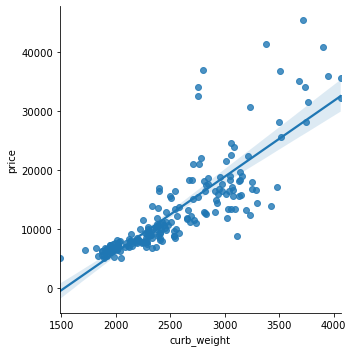

In [149]:
# Plotting a linear regression line based on curb weight.

sb.lmplot("curb_weight","price",data=data)

## Creating Model

In [150]:
cars.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'horsepower', 'peak_rpm', 'city_mpg', 'price'],
      dtype='object')

In [151]:
# Defining X and y

X=cars.iloc[:,:-1]
y=cars.price

In [152]:
# Split dataset into train and test set in order to predict

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.1,random_state=42)

### Fitting model using
1. Linear Regression
2. Random Forest
3. XGBOOST

In [153]:
# Importing necessary packages

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

### - Linear Regression 

In [154]:
# Define the model
lr_model=LinearRegression()

# Train
lr_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=lr_model.predict(X_test)

# Comparing both y_predict and y_test
r2=r2_score(y_test,y_predict)
r2

0.9261995911101497

In [155]:
lr_model.score(X_train,y_train)

0.8703811825692419

In [156]:
# Adjusted RSquared of the model

n=len(cars) # Number of records
p=len(cars.columns)-2 # Number of features .i.e. columns excluding uniqueId and target variable
adjr= 1-(1-r2)*((n-1)/(n-p-1))
print(adjr)

0.9179995456779442


In [157]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 2676.0589353074197
MSE: 10997272.94842337
RMSE: 3316.213646377955


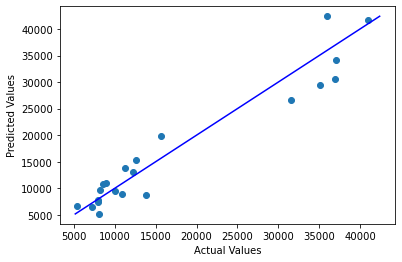

In [158]:
# Plotting the test and predict points

rcParams["figure.figsize"]=6,4
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [159]:
#Actual and Predicted Price
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
95,8949,10989.073811
15,36880,30637.458923
30,5399,6607.214675
158,8058,5163.184959
128,12170,13003.278425
115,7957,7855.486658
69,40960,41651.447814
171,10898,8860.367734
175,15690,19909.994562
45,36000,42398.145367


### - Random Forest

In [160]:
# Define the model
rf_model=RandomForestRegressor(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predicting and storing output
y_predict=rf_model.predict(X_test)

# Comparing both y_predict and y_test
r2=r2_score(y_test,y_predict)
r2

0.9796599872692244

In [161]:
rf_model.score(X_train,y_train)

0.9850960212285096

In [162]:
print('MAE:', metrics.mean_absolute_error( y_predict,y_test))
print('MSE:', metrics.mean_squared_error(y_predict,y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_predict,y_test)))

MAE: 1336.8737301587303
MSE: 3030940.819157277
RMSE: 1740.9597408203547


In [163]:
# Adjusted RSquared of the model

n=len(cars) # Number of records
p=len(cars.columns)-2 # Number of features .i.e. columns excluding uniqueId and target variable
adjr= 1-(1-r2)*((n-1)/(n-p-1))
print(adjr)

0.9773999858546938


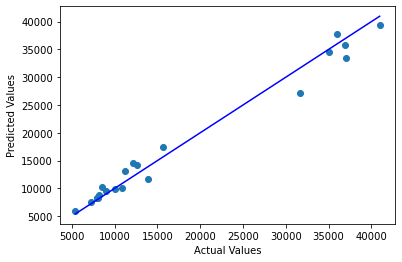

In [164]:
# Plotting the test and predict points

rcParams["figure.figsize"]=6,4
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [165]:
# Actual and Predicted Price

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
95,8949,9590.090000
15,36880,35774.220000
30,5399,5857.820000
158,8058,8309.860000
128,12170,14581.030000
115,7957,8173.980000
69,40960,39404.950000
171,10898,10079.900000
175,15690,17522.080000
45,36000,37722.170000
